In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


X=np.random.randint(10000, size=(100, 50))
print(X)


[[9485 2901  800 ... 2158 8112 1560]
 [1120 8379 6472 ... 1582 2588 7547]
 [7094 6156 2346 ... 5793 3797 6842]
 ...
 [3462 8729 3464 ... 8300 3719 6431]
 [8258 9168 7965 ... 9071 8657 9782]
 [9553  437 5958 ... 7790 7392 3301]]


/Users/fengjunyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


100


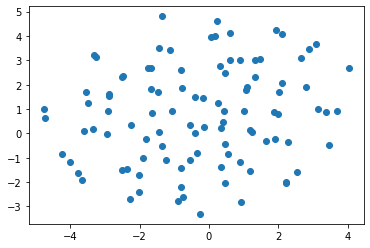

In [4]:
'''t-SNE'''
m = manifold.TSNE(learning_rate=50)
tsne_result = m.fit_transform(X)
print(len(tsne_result))
plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1])
#for i in range(len(tsne_result)):
#    plt.text(tsne_result[i,0],tsne_result[i,1],i)



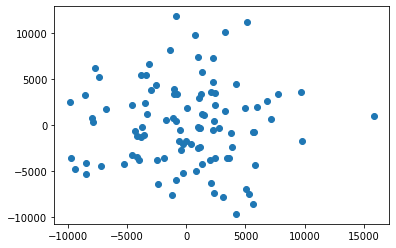

In [41]:
#PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.scatter(x=pca_result[:,0],y=pca_result[:,1])

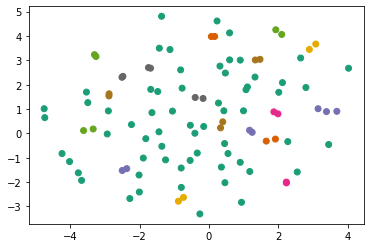

In [43]:
clusterer = DBSCAN(eps=0.3, min_samples=2, metric='euclidean')
y_pred = clusterer.fit_predict(tsne_result)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_pred, cmap='Dark2')

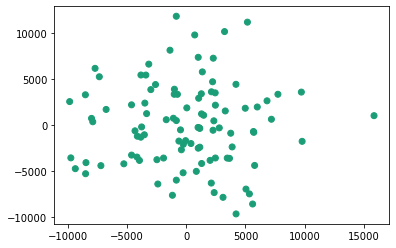

In [65]:
clusterer = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
z_pred = clusterer.fit_predict(pca_result)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=z_pred, cmap='Dark2')